In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("TelcomCustomer-Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...  DeviceProtection  \
0  No phone service             DSL             No  ...                No   
1                No             DSL            Yes  ...               Yes   
2                No             DSL            Yes  ...                No   
3  No phone service             DSL            Yes  ...               Yes   
4                No     Fiber optic             No  ...                No   

  TechSupport StreamingTV StreamingMovies        Contrac

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.shape

(7043, 21)

In [6]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

labels, values = zip(*Counter(df["Churn"]).items())
colors = ['lightblue', 'lightsteelblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

<Figure size 600x600 with 1 Axes>

 Distribution of the target variable is highly skewed, so only Accuracy as a metrics can be misleading

In [7]:
#To know the possible values in each column
for feature in df.columns:
    if df[feature].dtype == 'object':
        print("value_count for {} feature is: \n{}".format(feature, df[feature].value_counts()))
        print("--"*20)


value_count for customerID feature is: 
9978-HYCIN    1
6837-HAEVO    1
7217-JYHOQ    1
6631-HMANX    1
3688-FTHLT    1
2428-HYUNX    1
2587-EKXTS    1
7925-PNRGI    1
8614-VGMMV    1
2577-GVSIL    1
0357-NVCRI    1
8532-UEFWH    1
9503-XJUME    1
8414-MYSHR    1
4323-SADQS    1
8220-OCUFY    1
6135-OZQVA    1
9845-PEEKO    1
7638-QVMVY    1
1360-XFJMR    1
2656-FMOKZ    1
5931-FLJJF    1
1905-OEILC    1
9831-BPFRI    1
8499-BRXTD    1
0599-XNYDO    1
6861-XWTWQ    1
5879-SESNB    1
6907-FLBER    1
7020-OZKXZ    1
             ..
4908-XAXAY    1
1064-FBXNK    1
5353-WILCI    1
3370-GQEAL    1
3585-YNADK    1
4801-KFYKL    1
5271-DBYSJ    1
7481-ATQQS    1
6147-CBCRA    1
6275-YDUVO    1
2558-BUOZZ    1
3675-YDUPJ    1
0533-UCAAU    1
7297-DVYGA    1
3969-JQABI    1
7359-PTSXY    1
5567-GZKQY    1
5440-FLBQG    1
3643-AHCFP    1
4854-SSLTN    1
0661-WCQNQ    1
4459-BBGHE    1
8696-JKZNU    1
4765-OXPPD    1
0902-XKXPN    1
4184-TJFAN    1
9290-SHCMB    1
5940-AHUHD    1
4884-LEVMQ    1


In [8]:
#As the values in TotalCharges column is continuus to converting the datatype of TotalCharges Column to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [10]:
#Converting Columns with Categorial Value to Category Datatype
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
        
df['SeniorCitizen']=df['SeniorCitizen'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null category
gender              7043 non-null category
SeniorCitizen       7043 non-null category
Partner             7043 non-null category
Dependents          7043 non-null category
tenure              7043 non-null int64
PhoneService        7043 non-null category
MultipleLines       7043 non-null category
InternetService     7043 non-null category
OnlineSecurity      7043 non-null category
OnlineBackup        7043 non-null category
DeviceProtection    7043 non-null category
TechSupport         7043 non-null category
StreamingTV         7043 non-null category
StreamingMovies     7043 non-null category
Contract            7043 non-null category
PaperlessBilling    7043 non-null category
PaymentMethod       7043 non-null category
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null cate

In [11]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df[pd.isnull(df["TotalCharges"])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
#As the null values are 11 in count, so droping the rows with Null value
df = df.dropna()
df.drop(labels='customerID',inplace=True,axis=1)

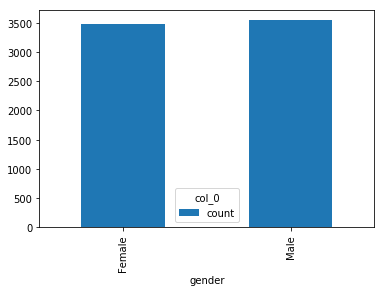

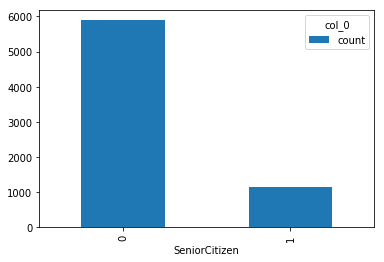

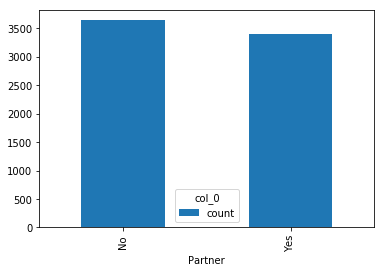

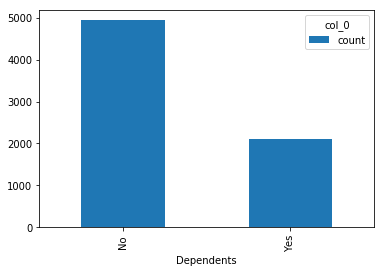

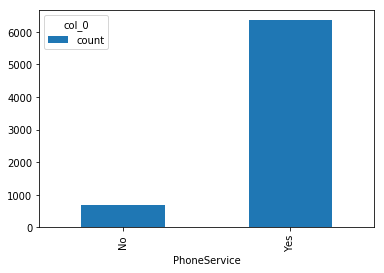

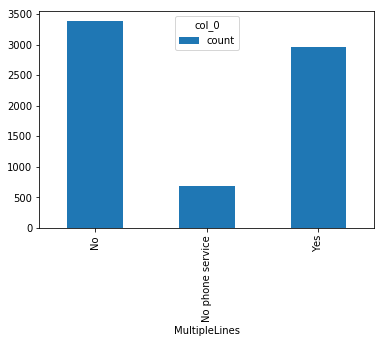

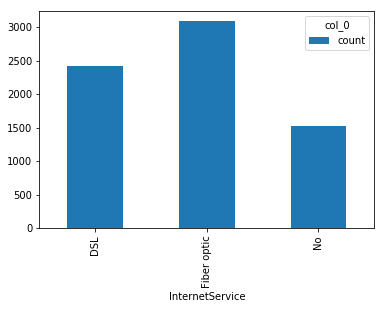

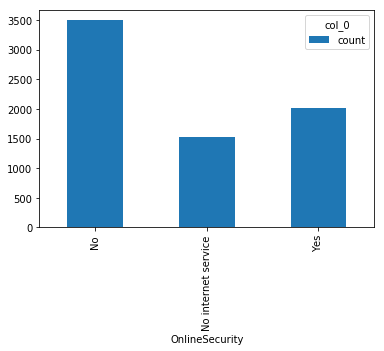

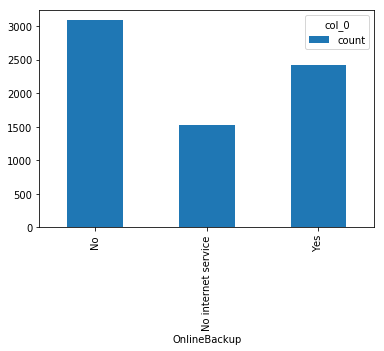

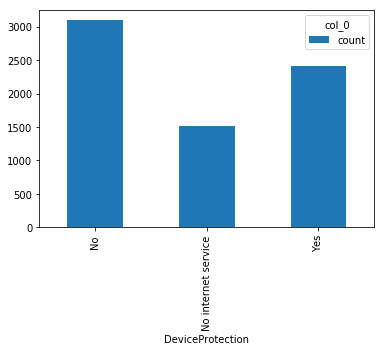

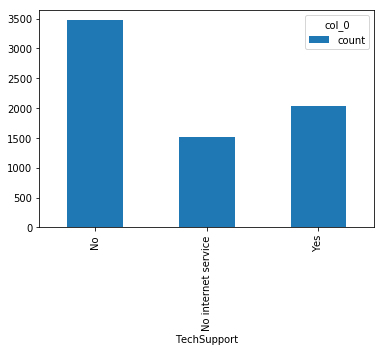

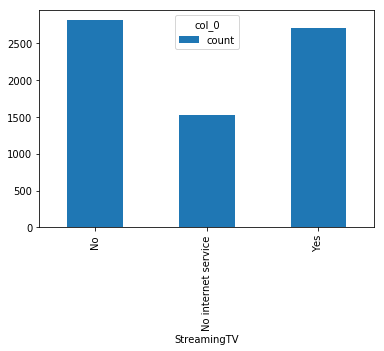

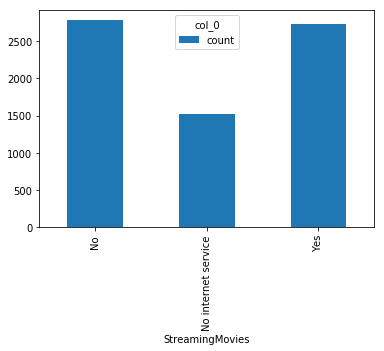

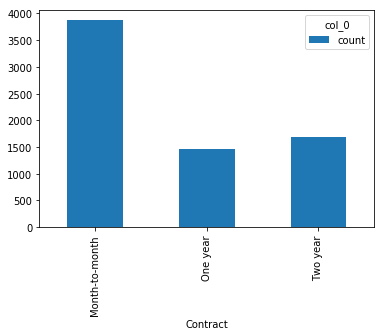

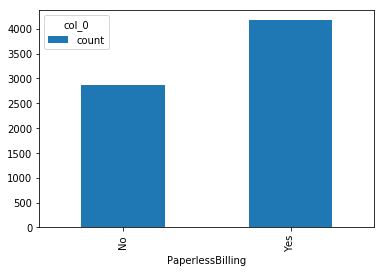

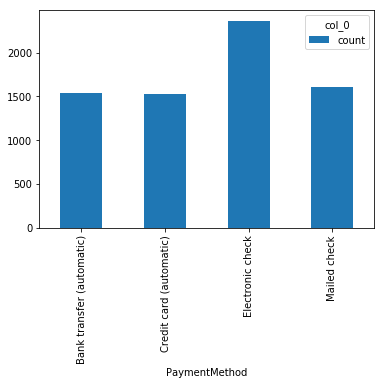

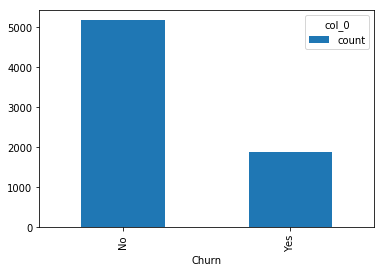

In [14]:
#univariate graphs of all categorical type columns 
cat = list(df.select_dtypes(include=["category"]).columns)
# Plots for categorical attributes
for i in cat:
    pd.crosstab(df[i],columns='count').plot(kind = 'bar')
    plt.savefig(i)

Distribution of gender and Partner is near to normal

In [15]:
dfOriginal = df
dfOriginal.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
dfOriginal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null category
SeniorCitizen       7032 non-null category
Partner             7032 non-null category
Dependents          7032 non-null category
tenure              7032 non-null int64
PhoneService        7032 non-null category
MultipleLines       7032 non-null category
InternetService     7032 non-null category
OnlineSecurity      7032 non-null category
OnlineBackup        7032 non-null category
DeviceProtection    7032 non-null category
TechSupport         7032 non-null category
StreamingTV         7032 non-null category
StreamingMovies     7032 non-null category
Contract            7032 non-null category
PaperlessBilling    7032 non-null category
PaymentMethod       7032 non-null category
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null category
dtypes: category(17), float64(2), int6

In [17]:
#Tagging the value with Ordinal values & Applying one hot encoding gor non ordinal value's columns
replaceStruct = {
                "Contract":     {"Month-to-month": 1, "One year": 2 ,"Two year": 3 }  ,
                "gender": {"Male":1,"Female":2},
                "Partner": {"No":0,"Yes":1},
                "Dependents": {"No":0,"Yes":1},
                "PhoneService":{"No":0,"Yes":1},
                "MultipleLines":{"No":0,"Yes":1,"No phone service":2},
                "OnlineSecurity":{"No":0,"Yes":1,"No internet service":2},
                "OnlineBackup":{"No":0,"Yes":1,"No internet service":2},
                "DeviceProtection":{"No":0,"Yes":1,"No internet service":2},
                "TechSupport":{"No":0,"Yes":1,"No internet service":2},
                "StreamingTV":{"No":0,"Yes":1,"No internet service":2},
                "StreamingMovies":{"No":0,"Yes":1,"No internet service":2},
                "PaperlessBilling":{"No":0,"Yes":1},
                "Churn":{"No":0,"Yes":1},
                }

replaceStructlist=list(replaceStruct.keys())
oneHotCols = list(df.select_dtypes(include=["category"]).columns)
print(oneHotCols)

for feature in replaceStructlist:
    oneHotCols.remove(feature)

oneHotCols.remove('SeniorCitizen')
print(oneHotCols)
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols,drop_first=True)
df.head(10)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['InternetService', 'PaymentMethod']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2,0,1,0,1,0,2,0,1,0,...,1,1,29.85,29.85,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,2,0,56.95,1889.50,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,1,53.85,108.15,1,0,0,0,0,1
3,1,0,0,0,45,0,2,1,0,1,...,2,0,42.30,1840.75,0,0,0,0,0,0
4,2,0,0,0,2,1,0,0,0,0,...,1,1,70.70,151.65,1,1,0,0,1,0
5,2,0,0,0,8,1,1,0,0,1,...,1,1,99.65,820.50,1,1,0,0,1,0
6,1,0,0,1,22,1,1,0,1,0,...,1,1,89.10,1949.40,0,1,0,1,0,0
7,2,0,0,0,10,0,2,1,0,0,...,1,0,29.75,301.90,0,0,0,0,0,1
8,2,0,1,0,28,1,1,0,0,1,...,1,1,104.80,3046.05,1,1,0,0,1,0
9,1,0,0,1,62,1,0,1,1,0,...,2,0,56.15,3487.95,0,0,0,0,0,0


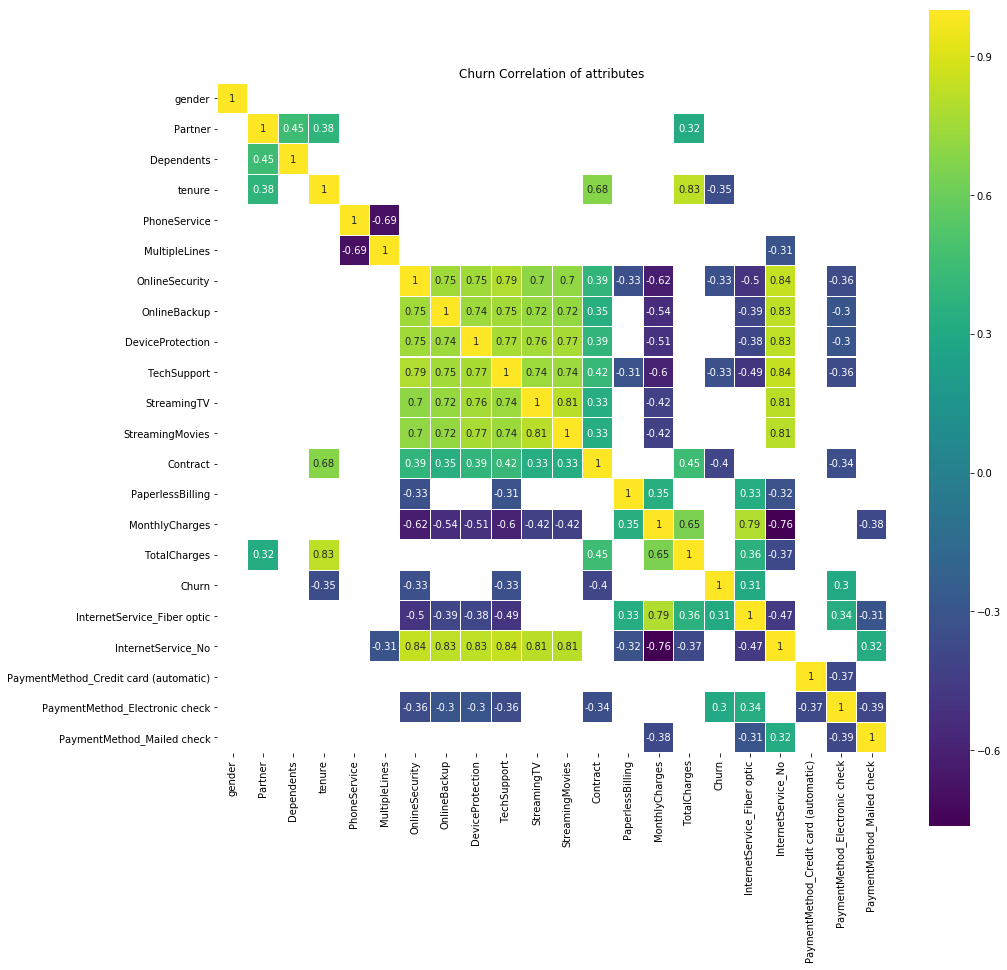

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=df.corr()
colormap = plt.cm.viridis 
plt.figure(figsize=(15,15))
plt.title('Churn Correlation of attributes')
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Above chart shows the high correlated features(columns) w.r.t churn

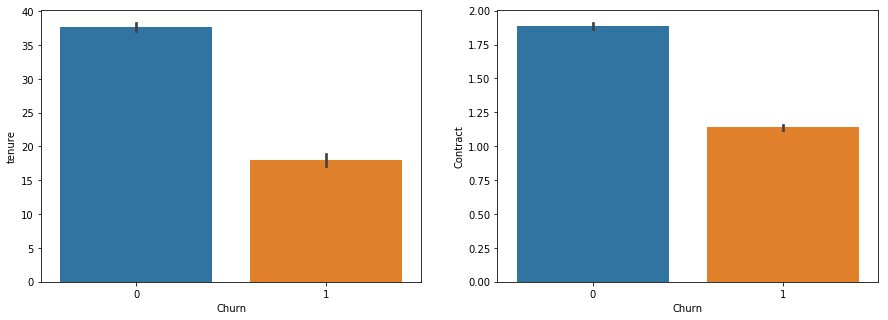

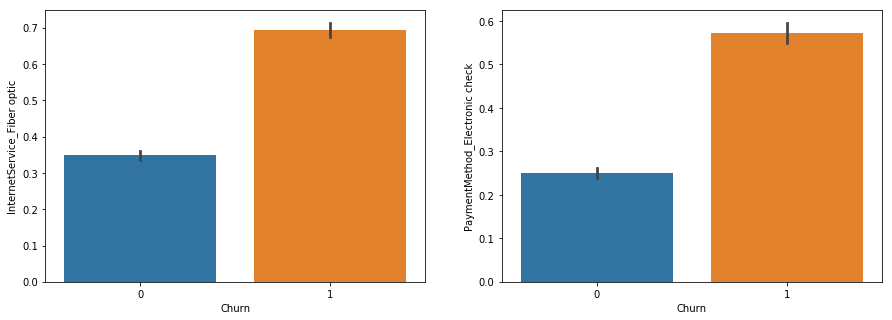

In [19]:
#Bivariate Charts w.r.t churn
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df['Churn'], df['tenure'])
plt.subplot(1,2,2)
sns.barplot(df['Churn'], df['Contract'])
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df['Churn'], df['InternetService_Fiber optic'])
plt.subplot(1,2,2)
sns.barplot(df['Churn'], df['PaymentMethod_Electronic check'])

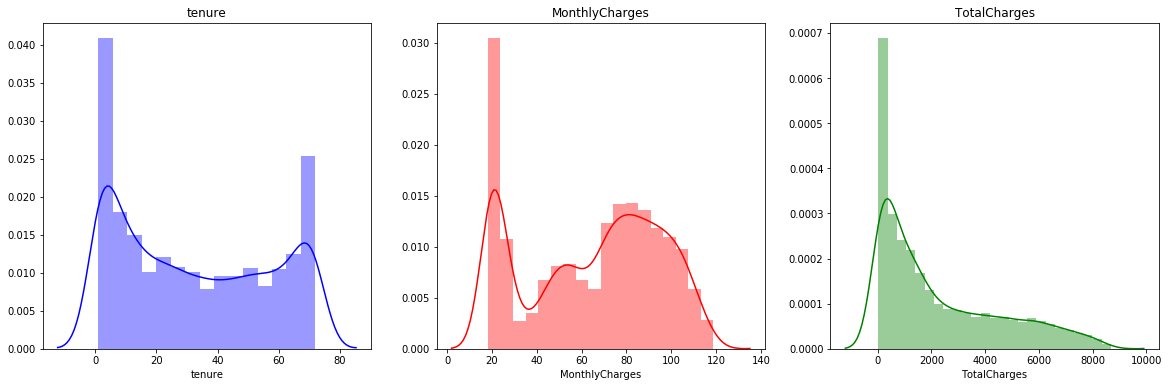

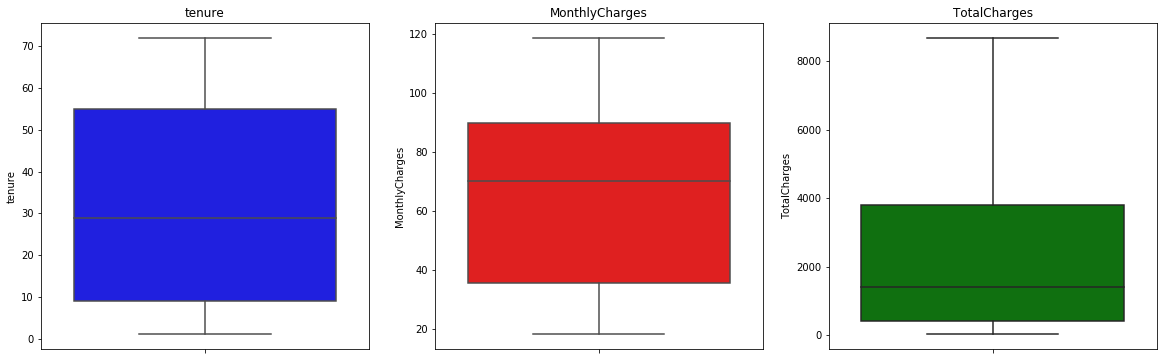

In [20]:
#checking Distribution of Continuous columns 
plt.figure(figsize=(20,6))
# subplot 1
plt.subplot(1, 3, 1)
plt.title('tenure')
sns.distplot(df['tenure'],color='blue')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('MonthlyCharges')
sns.distplot(df['MonthlyCharges'],color='red')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('TotalCharges')
sns.distplot(df['TotalCharges'],color='green')

plt.figure(figsize=(20,6))

# subplot 1
plt.subplot(1, 3, 1)
plt.title('tenure')
sns.boxplot(df['tenure'],orient='vertical',color='blue')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('MonthlyCharges')
sns.boxplot(df['MonthlyCharges'],orient='vertical',color='red')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('TotalCharges')
sns.boxplot(df['TotalCharges'],orient='vertical',color='green')

plt.show()

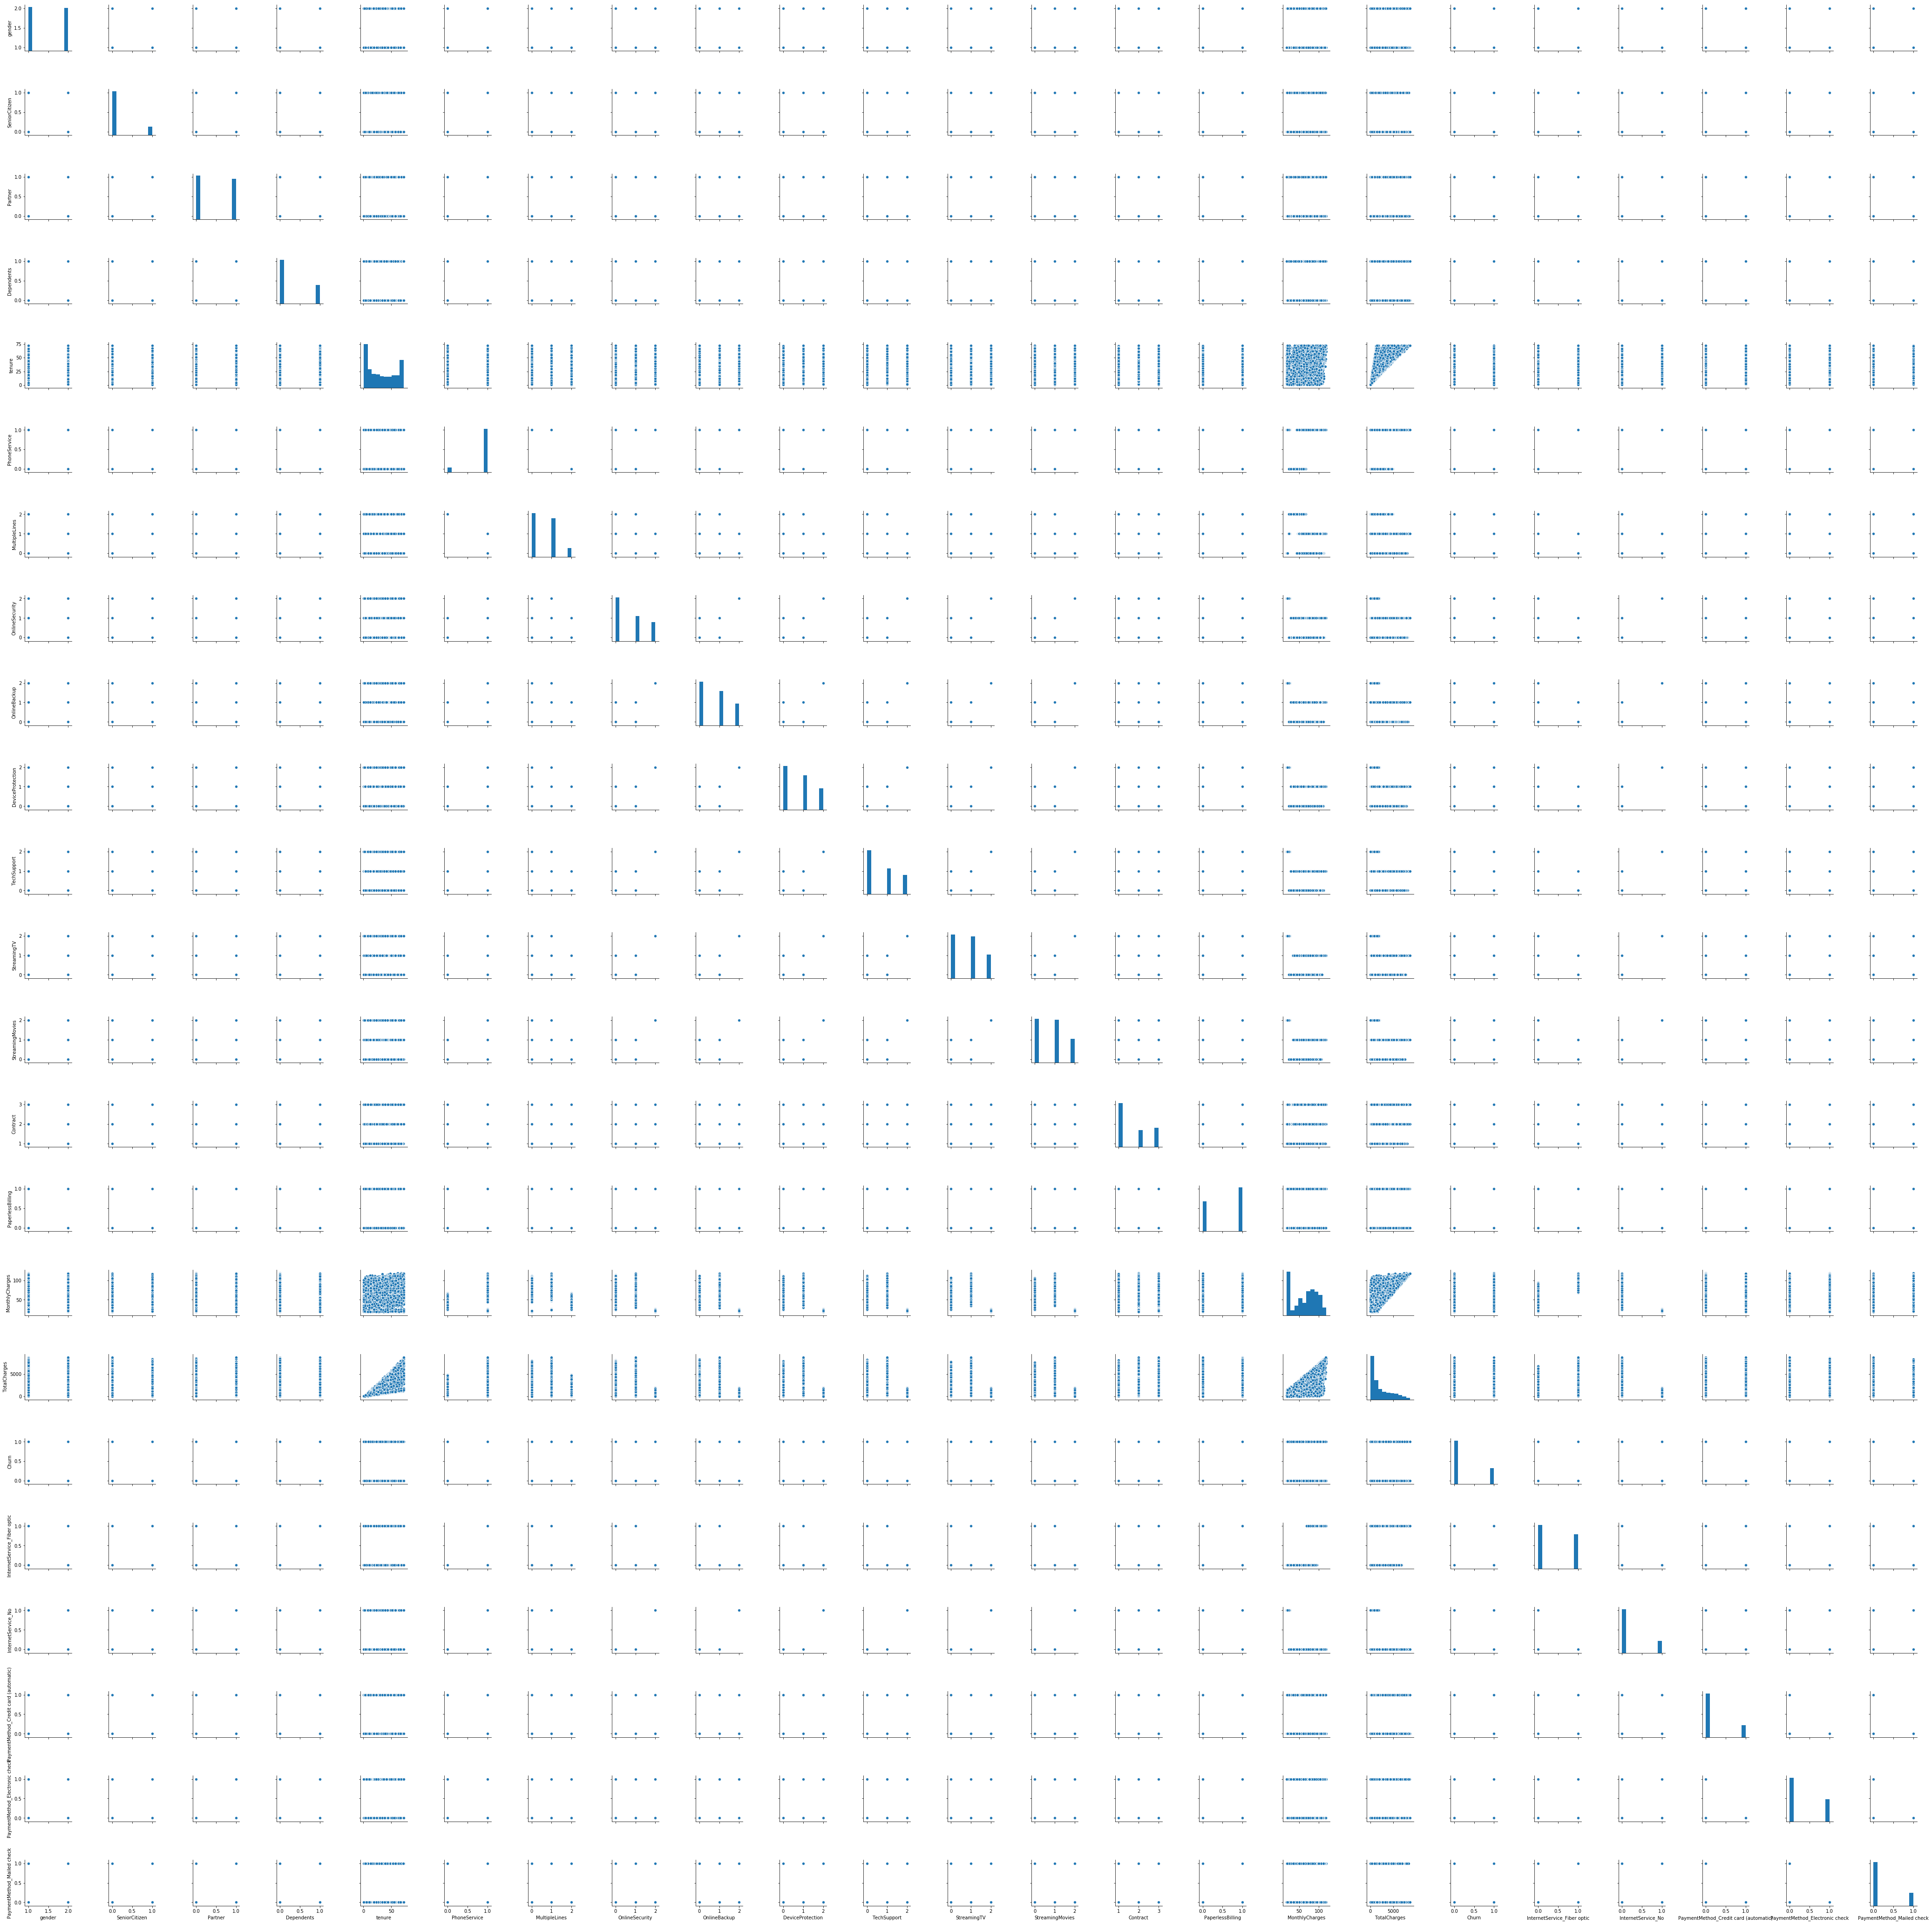

In [21]:
sns.pairplot(df)

In [22]:
col=df.columns
import scipy.stats as stats

# Chi_square test to check if the categorical variables individually make any difference to churn 
for i in np.arange(len(col)):
    crosstab=pd.crosstab(df['Churn'],df[col[i]])
    chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
    if p_value > 0.05:
        print(f'{col[i]} individually does not impact customer behaviour as the p_value ({p_value.round(3)}) > 0.05')
    else:
            print(f'{col[i]} individually impacts customer behaviour as the p_value ({p_value.round(3)}) < 0.05')

gender individually does not impact customer behaviour as the p_value (0.49) > 0.05
SeniorCitizen individually impacts customer behaviour as the p_value (0.0) < 0.05
Partner individually impacts customer behaviour as the p_value (0.0) < 0.05
Dependents individually impacts customer behaviour as the p_value (0.0) < 0.05
tenure individually impacts customer behaviour as the p_value (0.0) < 0.05
PhoneService individually does not impact customer behaviour as the p_value (0.35) > 0.05
MultipleLines individually impacts customer behaviour as the p_value (0.004) < 0.05
OnlineSecurity individually impacts customer behaviour as the p_value (0.0) < 0.05
OnlineBackup individually impacts customer behaviour as the p_value (0.0) < 0.05
DeviceProtection individually impacts customer behaviour as the p_value (0.0) < 0.05
TechSupport individually impacts customer behaviour as the p_value (0.0) < 0.05
StreamingTV individually impacts customer behaviour as the p_value (0.0) < 0.05
StreamingMovies indiv

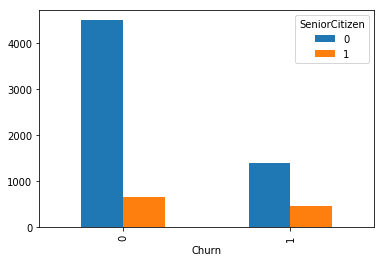

In [23]:
#checking the distribution impact by visualization the impacting columns
crosstab=pd.crosstab(df['Churn'],df['SeniorCitizen'])
crosstab.plot.bar()


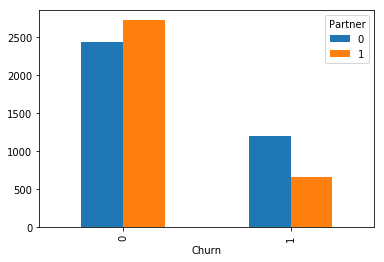

In [24]:
crosstab=pd.crosstab(df['Churn'],df['Partner'])
crosstab.plot.bar()

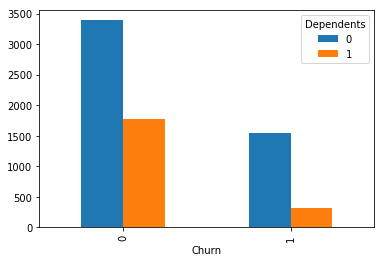

In [25]:
crosstab=pd.crosstab(df['Churn'],df['Dependents'])
crosstab.plot.bar()

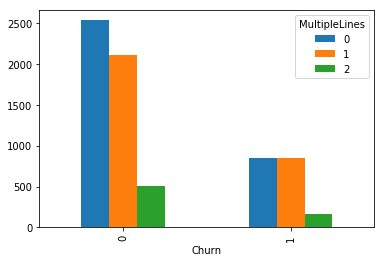

In [26]:
crosstab=pd.crosstab(df['Churn'],df['MultipleLines'])
crosstab.plot.bar()

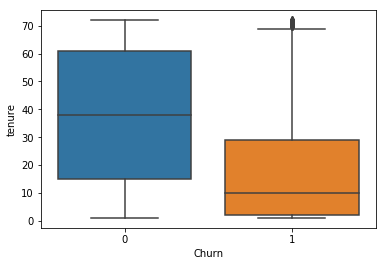

In [27]:
sns.boxplot(x = df.Churn, y = df.tenure)

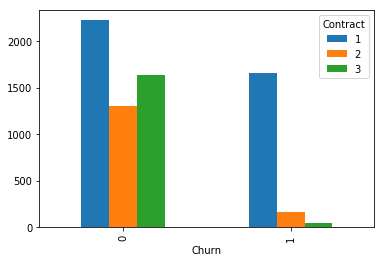

In [28]:
crosstab=pd.crosstab(df['Churn'],df['Contract'])
crosstab.plot.bar()

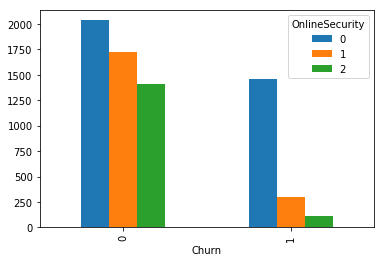

In [29]:
crosstab=pd.crosstab(df['Churn'],df['OnlineSecurity'])
crosstab.plot.bar()

In [30]:
#Segregate predictors vs target attributes  
X = df.drop("Churn", axis=1)
y = df['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [31]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(df.columns)
print(df.info())
x_cols=list(X_train.columns)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))

X_train.columns=x_cols
X_test = pd.DataFrame(scaler.fit_transform(X_test))
X_test.columns=x_cols
print(X_train.head())

(7032, 23)
(4922, 22)
(2110, 22)
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
gender                                   7032 non-null int64
SeniorCitizen                            7032 non-null category
Partner                                  7032 non-null int64
Dependents                               7032 non-null int64
tenure                                   7032 non-null int64
PhoneService                             7032 non

In [32]:
#Checking the split distribution, combining test and train data
df_combine = pd.concat([X_train, y_train], axis=1, ignore_index=True)
x_cols=list(X_train.columns)
x_cols.append("Churn")
print(x_cols)
df_combine.columns=x_cols
print(df_combine.Churn.value_counts())
#combining test and train data
df_combine = pd.concat([X_test, y_test], axis=1, ignore_index=True)
df_combine.columns=x_cols
print(df_combine.Churn.value_counts())

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn']
0.0    3608
1.0    1314
Name: Churn, dtype: int64
0.0    1555
1.0     555
Name: Churn, dtype: int64


# Build Decision Tree Model

In [33]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [34]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9979683055668428
0.7222748815165877


This model is Overfitted, need to work on max_depth

In [35]:
dTreeR = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7878911011783828
0.7976303317535545


Seems the Model is okay now 

In [36]:
from sklearn.tree import export_graphviz

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = export_graphviz(dTreeR, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

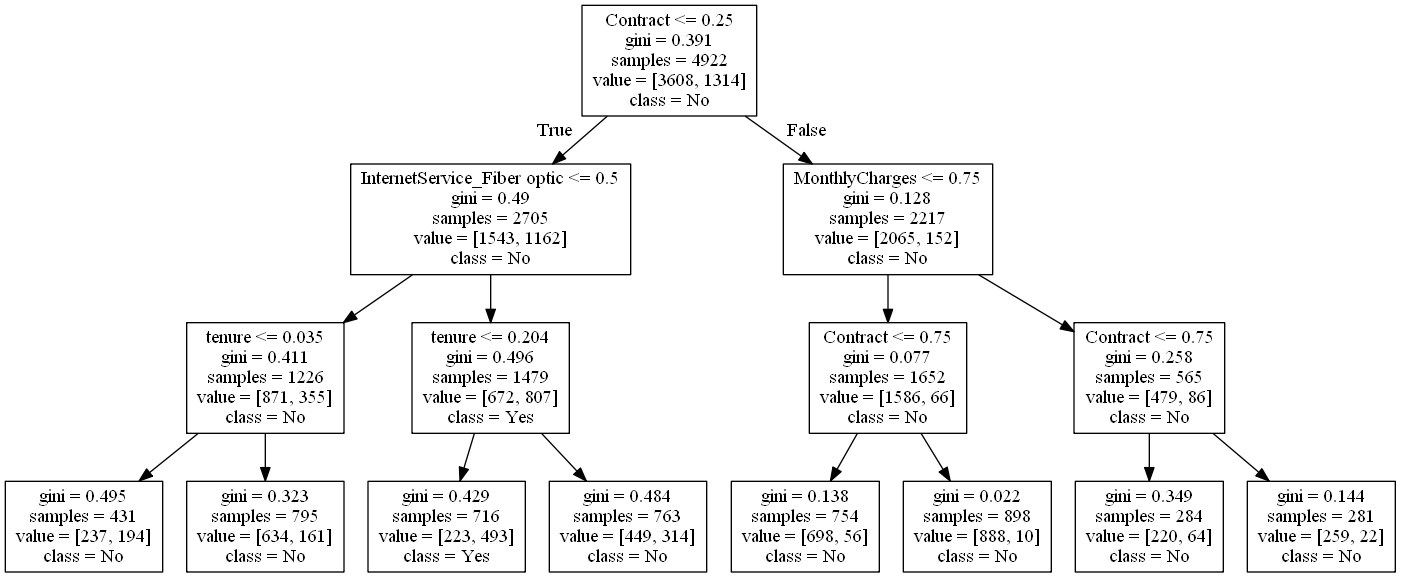

In [37]:
from os import system
from IPython.display import Image

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

In [38]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                            Imp
gender                                 0.000000
SeniorCitizen                          0.000000
Partner                                0.000000
Dependents                             0.000000
tenure                                 0.176119
PhoneService                           0.000000
MultipleLines                          0.000000
OnlineSecurity                         0.000000
OnlineBackup                           0.000000
DeviceProtection                       0.000000
TechSupport                            0.000000
StreamingTV                            0.000000
StreamingMovies                        0.000000
Contract                               0.633103
PaperlessBilling                       0.000000
MonthlyCharges                         0.020547
TotalCharges                           0.000000
InternetService_Fiber optic            0.170231
InternetService_No                     0.000000
PaymentMethod_Credit card (automatic)  0

Accuracy Score of test set : 0.80
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1555
           1       0.70      0.40      0.51       555

    accuracy                           0.80      2110
   macro avg       0.76      0.67      0.69      2110
weighted avg       0.78      0.80      0.78      2110



Text(0.5,15,'Predicted')

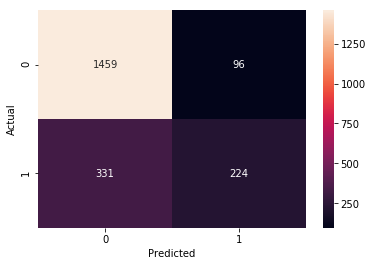

In [39]:
y_test_predict=dTreeR.predict(X_test)
test_acc_dt1=accuracy_score(y_test, y_test_predict)
conf_mat=confusion_matrix(y_test,y_test_predict)
print("Accuracy Score of test set : %.2f" %test_acc_dt1)
print(classification_report(y_test,y_test_predict))
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

AUC : 0.67


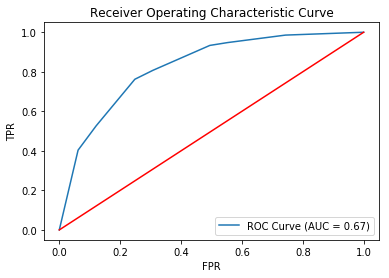

In [40]:
Sensitivity_dt1=0.40
y_prob = dTreeR.predict_proba(X_test)
AUC_dt1=roc_auc_score(y_test,y_test_predict)
print("AUC : %.2f" %AUC_dt1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_dt1)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

# Build Bagging Classification Model

In [41]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)
print(bgcl.score(X_train, y_train))
print(bgcl.score(X_test, y_test))

0.9975619666802112
0.7753554502369668


Base model is taken as Binary Tree,The Mode is Overfitted with Pure Tree(Homogenous tree)

In [42]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)
print(bgcl.score(X_train, y_train))
print(bgcl.score(X_test, y_test))

0.7882974400650142
0.7995260663507109


The Model seems okay when tried with weak Learners(Model)

Accuracy Score of test set : 0.80
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1555
           1       0.70      0.42      0.53       555

    accuracy                           0.80      2110
   macro avg       0.76      0.68      0.70      2110
weighted avg       0.79      0.80      0.78      2110



Text(0.5,15,'Predicted')

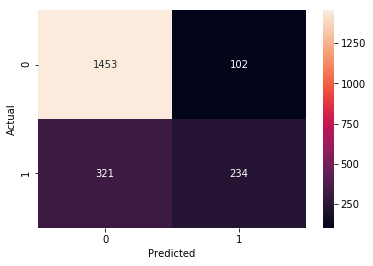

In [43]:
y_test_predict=bgcl.predict(X_test)
test_acc_bgcl=accuracy_score(y_test, y_test_predict)
conf_mat=confusion_matrix(y_test,y_test_predict)
print("Accuracy Score of test set : %.2f" %test_acc_bgcl)
print(classification_report(y_test,y_test_predict))
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

AUC : 0.68


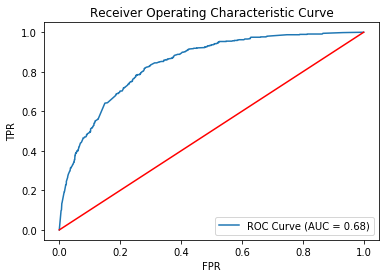

In [44]:
Sensitivity_bgcl1=0.42
y_prob = bgcl.predict_proba(X_test)
AUC_bgcl1=roc_auc_score(y_test,y_test_predict)
print("AUC : %.2f" %AUC_bgcl1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_bgcl1)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

# Build Random Forest Model

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=5,max_depth=5)
rfcl = rfcl.fit(X_train, y_train)
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))

0.8124746038195856
0.8023696682464455


Got Better Accuracy with max_feature=5 and max_depth=5

Accuracy Score of test set : 0.80
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1555
           1       0.68      0.48      0.56       555

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



Text(0.5,15,'Predicted')

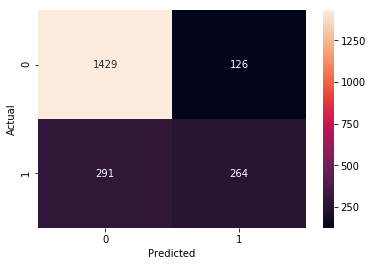

In [46]:
y_test_predict=rfcl.predict(X_test)
test_acc_rfcl=accuracy_score(y_test, y_test_predict)
conf_mat=confusion_matrix(y_test,y_test_predict)
print("Accuracy Score of test set : %.2f" %test_acc_rfcl)
print(classification_report(y_test,y_test_predict))
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

AUC : 0.70


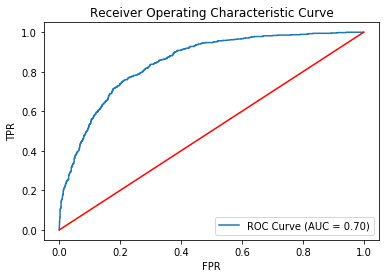

In [47]:
Sensitivity_rfcl1=0.48
y_prob = rfcl.predict_proba(X_test)
AUC_rfcl1=roc_auc_score(y_test,y_test_predict)
print("AUC : %.2f" %AUC_rfcl1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_rfcl1)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

# Build Adaptive Boosting Model

In [48]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dTreeR,n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)
print(abcl.score(X_train, y_train))
print(abcl.score(X_test, y_test))

0.8138967899227956
0.7867298578199052


Accuracy Score of test set : 0.79
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1555
           1       0.62      0.50      0.55       555

    accuracy                           0.79      2110
   macro avg       0.72      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



Text(0.5,15,'Predicted')

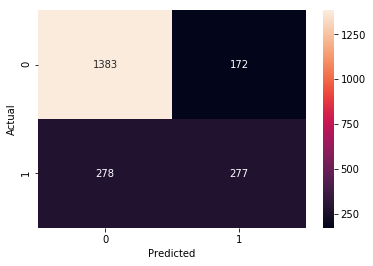

In [49]:
y_test_predict=abcl.predict(X_test)
test_acc_abcl=accuracy_score(y_test, y_test_predict)
conf_mat=confusion_matrix(y_test,y_test_predict)
print("Accuracy Score of test set : %.2f" %test_acc_abcl)
print(classification_report(y_test,y_test_predict))
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

AUC : 0.69


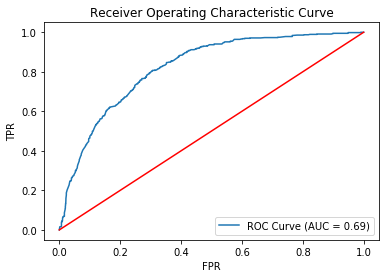

In [50]:
Sensitivity_abcl1=0.49
y_prob = abcl.predict_proba(X_test)
AUC_abcl1=roc_auc_score(y_test,y_test_predict)
print("AUC : %.2f" %AUC_abcl1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_abcl1)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

# Build Gradient Boosting Model

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test, y_test))

0.8244616009752134
0.8009478672985783


Accuracy Score of test set : 0.80
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1555
           1       0.66      0.50      0.57       555

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



Text(0.5,15,'Predicted')

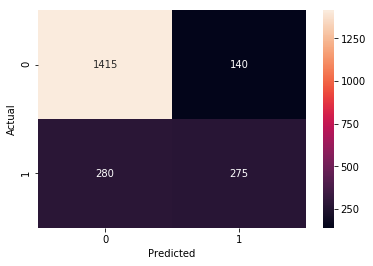

In [52]:
y_test_predict=gbcl.predict(X_test)
test_acc_gbcl=accuracy_score(y_test, y_test_predict)
conf_mat=confusion_matrix(y_test,y_test_predict)
print("Accuracy Score of test set : %.2f" %test_acc_gbcl)
print(classification_report(y_test,y_test_predict))
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

AUC : 0.70


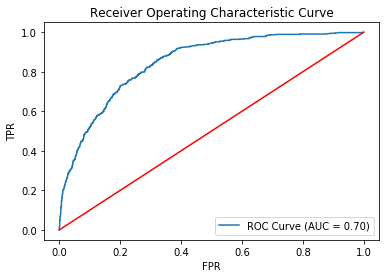

In [53]:
Sensitivity_gbcl1=0.50
y_prob = gbcl.predict_proba(X_test)
AUC_gbcl1=roc_auc_score(y_test,y_test_predict)
print("AUC : %.2f" %AUC_gbcl1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_gbcl1)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot



# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [55]:
stcl = get_stacking().fit(X_train, y_train)
print(stcl.score(X_train, y_train))
print(stcl.score(X_test, y_test))

0.8228362454286875
0.7985781990521327


Accuracy Score of test set : 0.80
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.54      0.58       555

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



Text(0.5,15,'Predicted')

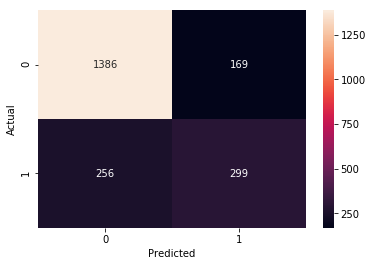

In [56]:
y_test_predict=stcl.predict(X_test)
test_acc_stcl=accuracy_score(y_test, y_test_predict)
conf_mat=confusion_matrix(y_test,y_test_predict)
print("Accuracy Score of test set : %.2f" %test_acc_stcl)
print(classification_report(y_test,y_test_predict))
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

AUC : 0.72


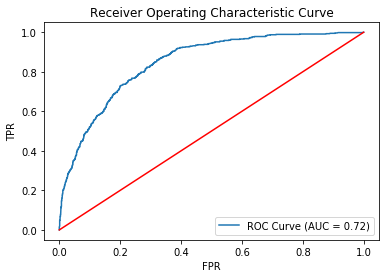

In [57]:
Sensitivity_stcl1=0.54
y_prob = gbcl.predict_proba(X_test)
AUC_stcl1=roc_auc_score(y_test,y_test_predict)
print("AUC : %.2f" %AUC_stcl1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_stcl1)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

In [58]:
Comparison={'Accuracy':[test_acc_dt1, test_acc_bgcl, test_acc_rfcl, test_acc_abcl, test_acc_gbcl,test_acc_stcl],
           'Area Under Curve':[AUC_dt1, AUC_bgcl1,  AUC_rfcl1, AUC_abcl1, AUC_gbcl1,AUC_stcl1],
           'Sensitivity': [Sensitivity_dt1, Sensitivity_bgcl1,  Sensitivity_rfcl1, Sensitivity_abcl1, Sensitivity_gbcl1,Sensitivity_stcl1]}
Comparison = pd.DataFrame(Comparison, index=['DecisionTree','BaggingClassifier', 'RandomForest','AdaBoostClassifier', 'GradientBoostingClassifier','StackingClassifier'])
Comparison

,Accuracy,Area Under Curve,Sensitivity
DecisionTree,0.797630,0.670934,0.40
BaggingClassifier,0.799526,0.678013,0.42
RandomForest,0.802370,0.697323,0.48
AdaBoostClassifier,0.786730,0.694244,0.49
GradientBoostingClassifier,0.800948,0.702732,0.50
StackingClassifier,0.798578,0.715029,0.54


Text(0.5,1,'Evaluation Metrics Comparison')

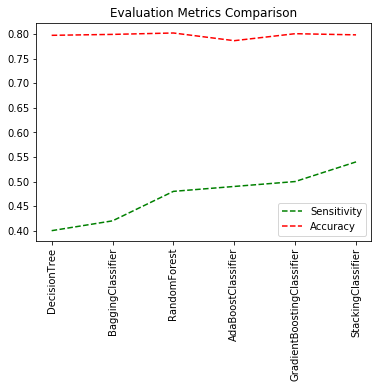

In [59]:
plt.plot(Comparison.index,Comparison.Sensitivity, 'g--', label='Sensitivity')
plt.plot(Comparison.index,Comparison.Accuracy, 'r--', label='Accuracy')
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.title("Evaluation Metrics Comparison")


Generally model accuracy predicts the effectiveness of model, but as the distribution of the target variable is highly skewed, which is in favor of customers who did not churn, Accuracy as a metric can be misleading. Hence in such situation its good to have AUC and/or Sensitivity comparison(for Class 1). StackingClassifier has comparatively higher Sensitivity and higher AUC as compared to Other Ensemble Models. 

I would choose StackingClassifier as my final model as addition to above mentioned points it also has better f-score, and precision is also not that bad as compared to other models.

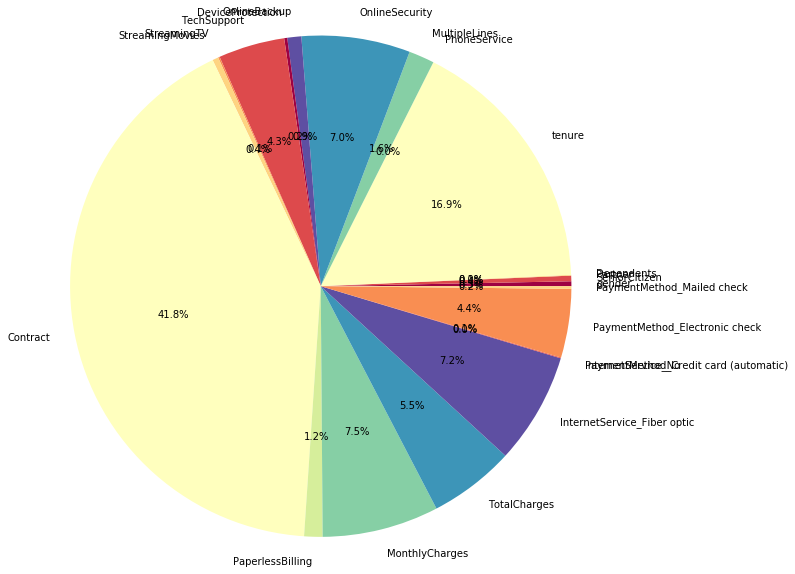

In [60]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 9)]

plt.figure(figsize=(10,10))
plt.pie(gbcl.feature_importances_, labels=X.columns,autopct='%1.1f%%', shadow=False, colors=colors)
plt.axis('equal')
plt.show()

In [61]:
def prework(df_test):

    df_test['TotalCharges']=pd.to_numeric(df_test['TotalCharges'],errors="coerce")
    df_test['MonthlyCharges']=pd.to_numeric(df_test['MonthlyCharges'],errors="coerce")
    df_test['tenure']=pd.to_numeric(df_test['tenure'],errors="coerce")
    #print("check2")
    
    for feature in df_test.columns: # Loop through all columns in the dataframe
        if df_test[feature].dtype == 'object': # Only apply for columns with categorical strings
            df_test[feature] = pd.Categorical(df_test[feature])# Replace strings with an integer
    
 
    
    replaceStruct = {
                    "Contract":     {"Month-to-month": 1, "One year": 2 ,"Two year": 3 }  ,
                    "gender": {"Male":1,"Female":2},
                    "Partner": {"No":0,"Yes":1},
                    "Dependents": {"No":0,"Yes":1},
                    "PhoneService":{"No":0,"Yes":1},
                    "MultipleLines":{"No":0,"Yes":1,"No phone service":2},
                    "OnlineSecurity":{"No":0,"Yes":1,"No internet service":2},
                    "OnlineBackup":{"No":0,"Yes":1,"No internet service":2},
                    "DeviceProtection":{"No":0,"Yes":1,"No internet service":2},
                    "TechSupport":{"No":0,"Yes":1,"No internet service":2},
                    "StreamingTV":{"No":0,"Yes":1,"No internet service":2},
                    "StreamingMovies":{"No":0,"Yes":1,"No internet service":2},
                    "PaperlessBilling":{"No":0,"Yes":1},
                    }

    replaceStructlist=list(replaceStruct.keys())
  
    oneHotCols = list(df_test.select_dtypes(include=["category"]).columns)

    for feature in replaceStructlist:
        oneHotCols.remove(feature)

    oneHotCols.remove('SeniorCitizen')

    df_test=df_test.replace(replaceStruct)

    df_test['InternetService_Fiber optic']=0
    df_test['InternetService_No']=0
    df_test['PaymentMethod_Credit card (automatic)']=0
    df_test['PaymentMethod_Electronic check']=0
    df_test['PaymentMethod_Mailed check']=0
    if df_test.get_value(0, 'InternetService') =="Fiber optic":
        df_test['InternetService_Fiber optic']=1
    elif df_test.get_value(0, 'InternetService') =="No":
        df_test['InternetService_No']=1
        
    if df_test.get_value(0, 'PaymentMethod') =="Credit card (automatic)":
        df_test['PaymentMethod_Credit card (automatic)']=1
    elif df_test.get_value(0, 'PaymentMethod') =="Electronic check":
        df_test['PaymentMethod_Electronic check']=1
    elif df_test.get_value(0, 'PaymentMethod') =="Mailed check":
        df_test['PaymentMethod_Mailed check']=1            

    df_test.drop(labels='InternetService', axis=1,inplace=True)
    df_test.drop(labels='PaymentMethod', axis=1,inplace=True)
    #print("dummie")  
    #scaler = MinMaxScaler()
    df_test_cols=df_test.columns
    df_test = pd.DataFrame(scaler.transform(df_test))
    df_test.columns=df_test_cols
  
    return df_test

In [62]:
from tkinter import *
from tkinter import ttk
import os

window=Tk()
window.title("GUI")
window.configure(background="white")
combo=['']*19
comboA=['']*19
df_test=pd.DataFrame()
df_numeric_test=pd.DataFrame()
y_predict_input=""
result=""

def click():
    print("In Submit Function")
    inc=0
    for itr in combo:
        comboA[inc]=combo[inc].get()
        #print(combo[inc].get())
        inc=inc+1
        
    #print(comboA)  
    try:
        os.remove("Churn_predict.csv")
    except:
        print("All Well, No File Found!!!")

    output.delete(0.0,END)
    try:
        if comboA.index('') >=0:
            output.insert(END,"ALERT: All Fields are mandatory !!!")
    except:
        df_test=pd.DataFrame(comboA)
        df_test=df_test.T
        df_test.columns=dfOriginal.drop(labels="Churn",axis=1).columns
        
        #df_numeric_test['Quarters_isalphanumeric'] = map(lambda x: x.isnumeric(), df_test['TotalCharges'])
        #print(df_numeric_test['Quarters_isalphanumeric'].value_counts())
        #if (df_numeric_test['Quarters_isalphanumeric']=='false').any():
        #    output.insert(END,"ALERT:Total Charges can only be numerical !!!")    
        #else:
        
        try:
            print("In PreProcessing Block!!")
            df_test=prework(df_test)
            df_test.to_csv("Churn_predict.csv")
        except:
            output.insert(END,"ALERT:Check Total Charges, MonthlyCharges, tenure should be numerical only!!!")

    
def predict():
        print("In predict Function")
        df_test=pd.read_csv("Churn_predict.csv")
        try:
            os.remove("Churn_predict.csv")
        except:
            print("All Well, No File Found!!!")
        df_test.drop(labels="Unnamed: 0",axis=1,inplace=True)
        #print(df_test.head())
        #print(df_test.info())
        y_predict_input=stcl.predict(df_test)
        if y_predict_input==1:
            result="Predicted: Churn !!!"
        elif y_predict_input==0:
            result="Predicted: Not Churn !!!"
        output.insert(END,result)    
        
    
#list=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'Multiple Lines', 'InternetService', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges','Total Charges']

listOrg = list(dfOriginal.columns)
listOrg.remove("Churn")
inc=-1
for x in listOrg:
    inc=inc+1
    Label(window,text=x,background="silver",fg="black",font="none 12",borderwidth=4).grid(row=inc,column=0,sticky='W')
    #txtEntry=Entry(window,width=20,bg="silver",fg="black",font="none 10",borderwidth=4).grid(row=inc,column=1,sticky='E')
    try:
        if dfOriginal[x].dtype.name=="category":
            combo[inc] = ttk.Combobox(window, width = 27) 
            combo[inc]['values'] = list(dfOriginal[x].values.unique())
            combo[inc].grid(row=inc,column = 1,sticky='E') 
            combo[inc].current() 
        else:
            combo[inc]=Entry(window,width=20,bg="silver",fg="black",font="none 10",borderwidth=4)
            combo[inc].grid(row=inc,column=1,sticky='E')
    except:
        combo[inc]=Entry(window,width=20,bg="silver",fg="black",font="none 10",borderwidth=4)
        combo[inc].grid(row=inc,column=1,sticky='E')
    #print(combo[inc].get())
Button(window,text="SUBMIT",width=6,command=click).grid(row=len(listOrg)+2,column=0)
Button(window,text="PREDICT",width=6,command=predict).grid(row=len(listOrg)+3,column=0)

output=Text(window,width=28,height=3,wrap=WORD,bg='white')
output.grid(row=len(listOrg)+1,column=1,rowspan=3)
#Predict_entrybox=ttk.Entry(window,width=20)
#Predict_entrybox.grid(row=len(listOrg)+2,column=1)
#Predict_entrybox.insert(1,str(result))

window.mainloop()

In Submit Function
All Well, No File Found!!!
In PreProcessing Block!!
In predict Function


Closing Remarks:-
It would be interesting to have more features, some continuous ones preferably in our model. This would probably increase the efficiency of our models.

We came across a couple of articles that mentioned that Decision Trees handle categorical variables better than continuous variables. That did not seem to be the case in our models.

Based on the model scores of above ensemble techniques to predict customer churn,  StackingClassifier seems to be the best model for this dataset, anyhow the precision, f1 and recall achieved is not good. We should also try other classification models for better predictions.
